# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

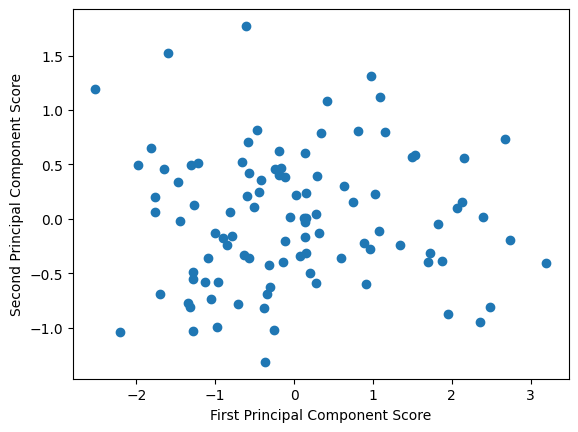

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The outliers on the graph may be data points that are very different than the bulk of the data. They could be rare events or errors captured in the data set.  They have low First Principal Component scores and high Second Component scores.  This means they have similar variance to the first component but are very different than the trend captured by the second component.  

This graph helps us understand the direction of greatest variance for the data.  This could help us understand if there are any groups or outliers (like the 3 in the upper left corner) that need further analysis.  We need to check for the amount of variance that is captured by the first two components to determine if it captures most of the variance in the data or if additional components would be needed to fully explain the variance.  

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [9]:
import seaborn as sns

In [7]:
austin_data= pd.read_csv('austinHousingData.csv')

In [8]:
austin_data

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15169,29392029,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,1.98,0,False,...,1,1,1.300000,6.666667,1057,15,2.0,4,1,29392029_a9a8306ea363d23f37d91d37975a1b96-p_f.jpg


In [10]:
print(austin_data.columns)

Index(['zpid', 'city', 'streetAddress', 'zipcode', 'description', 'latitude',
       'longitude', 'propertyTaxRate', 'garageSpaces', 'hasAssociation',
       'hasCooling', 'hasGarage', 'hasHeating', 'hasSpa', 'hasView',
       'homeType', 'parkingSpaces', 'yearBuilt', 'latestPrice',
       'numPriceChanges', 'latest_saledate', 'latest_salemonth',
       'latest_saleyear', 'latestPriceSource', 'numOfPhotos',
       'numOfAccessibilityFeatures', 'numOfAppliances', 'numOfParkingFeatures',
       'numOfPatioAndPorchFeatures', 'numOfSecurityFeatures',
       'numOfWaterfrontFeatures', 'numOfWindowFeatures',
       'numOfCommunityFeatures', 'lotSizeSqFt', 'livingAreaSqFt',
       'numOfPrimarySchools', 'numOfElementarySchools', 'numOfMiddleSchools',
       'numOfHighSchools', 'avgSchoolDistance', 'avgSchoolRating',
       'avgSchoolSize', 'MedianStudentsPerTeacher', 'numOfBathrooms',
       'numOfBedrooms', 'numOfStories', 'homeImage'],
      dtype='object')


In [17]:
pivot = austin_data.pivot_table (index= ["zipcode"], columns=["latest_saleyear"], values = "latestPrice", aggfunc= "mean")
pivot

latest_saleyear,2018,2019,2020,2021
zipcode,,,,
78617,1.939905e+05,2.003212e+05,1.987504e+05,1.375000e+05
78619,6.500000e+05,7.439650e+05,7.848000e+05,NaN
78652,NaN,NaN,3.753398e+05,NaN
78653,NaN,3.699000e+05,2.974900e+05,NaN
78660,2.501096e+05,2.856954e+05,3.031252e+05,NaN
78701,5.713000e+05,3.495000e+06,NaN,1.049000e+06
78702,4.486048e+05,4.986863e+05,5.734612e+05,4.681500e+05
78703,1.122031e+06,1.181184e+06,1.258904e+06,1.829333e+06
78704,7.441405e+05,8.018094e+05,9.243613e+05,1.021843e+06


Text(0.5, 1.0, 'Average Sales Price by Year and Zipcode')

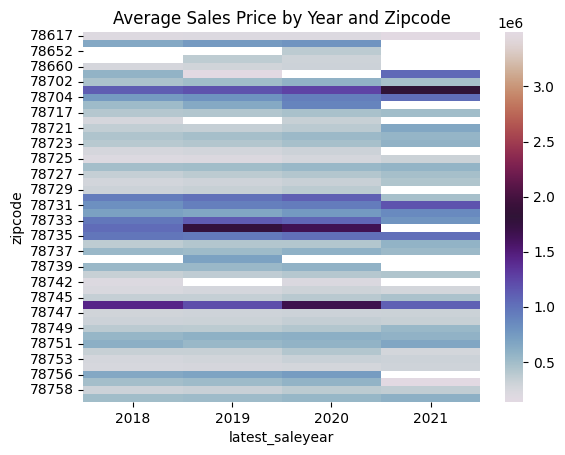

In [18]:
ax = sns.heatmap(pivot, cmap="twilight")
ax.set_title("Average Sales Price by Year and Zipcode")

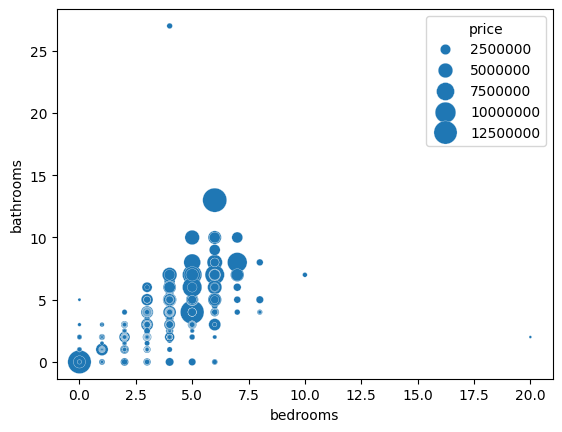

In [22]:
x_series = austin_data["numOfBedrooms"]
y_series = austin_data["numOfBathrooms"]
size_series = austin_data["latestPrice"]
mini_data = pd.DataFrame({'bedrooms': x_series, 'bathrooms': y_series, 'price': size_series})
minprice = size_series.min()
maxprice = size_series.max()
maxbubble = 300
ax1 = sns.scatterplot(data= mini_data, x = "bedrooms", y = "bathrooms", size = "price", sizes = (minprice/maxprice * maxbubble, maxbubble))

In [24]:
austin_data_numeric = austin_data.select_dtypes(include=['number'])

In [29]:
pca = decomposition.PCA(n_components=2)
pca.fit(austin_data_numeric)

print(f"PC1 {pca.explained_variance_ratio_[0]}")

PC1 0.9985150382315406


The majority of the variance in the data is captured in this firrst dimension.  

In [30]:
print(f"components vector: {pca.components_}")

components vector: [[ 9.99999999e-01 -3.13788107e-09 -1.68824959e-11  1.56833268e-12
  -1.90333204e-12 -8.19394615e-12 -6.00006785e-12  1.44757518e-08
   1.06951193e-05 -3.87581489e-10  1.19940294e-10  1.36803071e-10
  -8.31795813e-10  5.27192754e-12  4.75825680e-11 -1.62053663e-10
   6.77451025e-11  1.31245554e-10 -1.57691511e-12 -2.44612197e-11
  -3.50096390e-12 -4.62987016e-05 -2.34146693e-08  2.10912101e-12
   1.18913189e-12 -1.99476324e-12  1.57192666e-11  1.59343748e-10
  -2.83315829e-10 -3.63799924e-08 -3.54903692e-10  1.74874004e-10
  -9.98572231e-11 -2.47373400e-12]
 [ 4.62903896e-05 -2.25562274e-08  1.50052615e-11  3.40022853e-12
  -8.67088341e-12  2.51544949e-09  2.51803812e-09 -2.11033381e-08
   7.75879893e-04 -2.16769445e-13 -3.08709973e-09  6.25614938e-10
  -5.22091076e-09 -9.06624713e-12  3.02368995e-09  1.77372647e-10
   8.76848091e-10  3.57613697e-10 -1.47694250e-12 -1.27138785e-10
  -9.68020143e-12  9.99999698e-01  7.83152463e-07  3.49779442e-11
  -3.19711568e-11 -1.6

Text(0, 0.5, 'Second Principal Component Score')

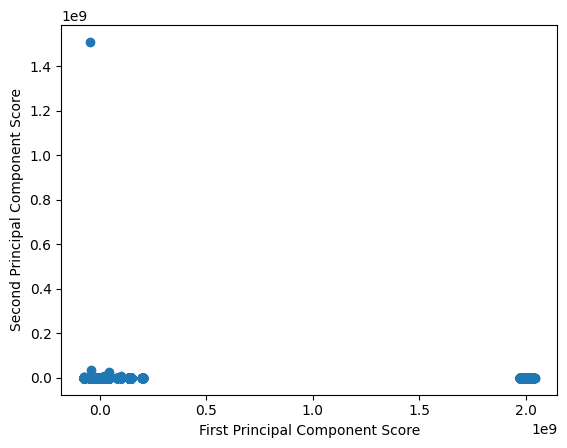

In [32]:
scores = pca.transform(austin_data_numeric)
first_principal_component_score1 = scores[:, 0]
second_principal_component_score1 = scores[:, 1]
plt.scatter(first_principal_component_score1, second_principal_component_score1)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The outliers in the upper left and bottom right corners make this graph impossible to read in order to determine trends in the bulk of the data. 

In [33]:
from scipy import stats

Text(0, 0.5, 'Second Principal Component Score')

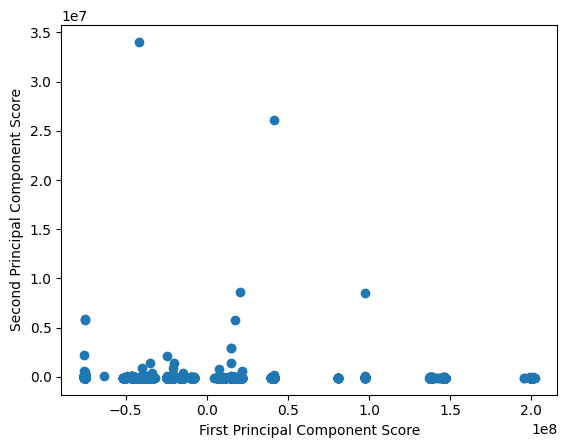

In [34]:
z_pc1 = np.abs(stats.zscore(first_principal_component_score1))
z_pc2 = np.abs(stats.zscore(second_principal_component_score1))

threshold = 3 
test = (z_pc1 < threshold)& (z_pc2 < threshold)

filtered_pc1 = first_principal_component_score1[test]
filtered_pc2 = second_principal_component_score1[test]

plt.scatter(filtered_pc1, filtered_pc2)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")


Without the outliers we are able to see there are definite groups present with the majority of the data concentrated between -0.5 and 0.5.  We can see that there are still a few points that vary greatly from the bulk of the data while still being less than 3 standard deviations away from the mean.  

chatgpt convo 1: 
I tried to build the scatterplot resuing the code from section 1 and got an error I asked for help with the error and used one of the possible solutions provided 

That error means the shapes of your DataFrame (`df`) and the PCA component vectors (`pca.components_`) do not match. In other words, you’re trying to do a dot product between:

- A matrix of shape \((100, 3)\) (your `df` has 3 columns)
- A vector of shape \((34, )\) (each principal component has 34 entries)

To fix this, you must ensure the number of columns in `df` matches the number of features the PCA was fit on (which is 34 in your case). Here are two common ways to resolve this:

---

## 1. Use the Same Data/Columns as the PCA

If you fit PCA on a dataset with 34 features, you need to pass those **exact same 34 columns** (in the same order) to get valid dot products. For instance:

```python
# Suppose you originally fit PCA on a DataFrame called df_full with 34 columns
pca.fit(df_full)

# Then, when you want to project new data:
df_new = df_full[some_selection_of_those_34_columns]  # must still be 34 columns total

# Now the shapes will match
first_pc_score = df_new.dot(pca.components_[0])
second_pc_score = df_new.dot(pca.components_[1])
```

If your `df` only has 3 columns, but PCA was trained on 34 columns, you’ll get the mismatch.

---

## 2. Use `pca.transform(...)` Instead of Manual Dot Products

A simpler (and more robust) way is to rely on the PCA object’s `transform` method, which does the correct matrix multiplication for you. For example:

```python
# df_full has the same columns used to fit the PCA
scores = pca.transform(df_full)  # shape will be (num_samples, n_components)

# If you asked PCA for at least 2 components, you can do:
first_pc_score = scores[:, 0]
second_pc_score = scores[:, 1]

plt.scatter(first_pc_score, second_pc_score)
```

This approach automatically uses the full, correct shape and avoids shape mismatch errors.

---

### Key Takeaway

The root cause is that **the number of columns in your DataFrame does not match the number of features the PCA was trained on**. Either select the same columns or use `pca.transform(df)` on the matching data to avoid the dot product shape mismatch.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

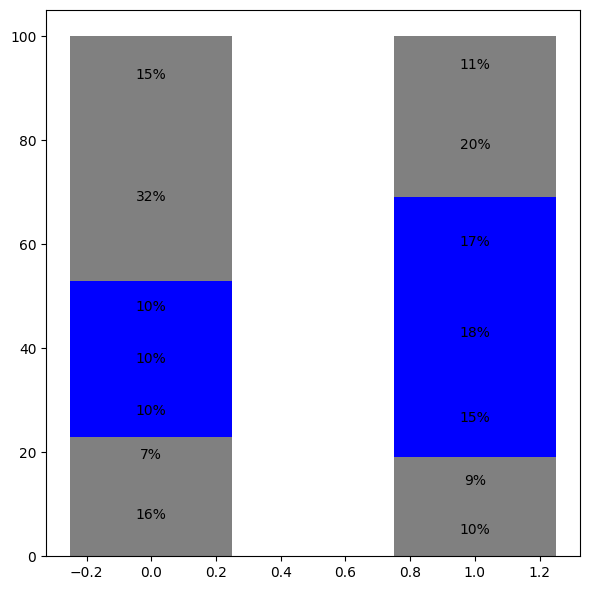

In [6]:
segments = ["Segment 1", "Segment 2", "Segment 3", "Segment 4", "Segment 5", "Segment 6", "Segment 7"]
us_pop = [16, 7, 10, 10, 10, 32, 15]
customers = [10, 9, 15, 18, 17, 20, 11]

colors = ["gray", "gray", "blue", "blue", "blue", "gray", "gray"]

x_positions = [0,1]
fig, ax = plt.subplots(figsize=(6,6))
bar_width = 0.5

bottom_us = 0
bottom_customer= 0 

for i in range(len(segments)):
    ax.bar(x_positions[0], us_pop[i], bar_width, bottom=bottom_us, color = colors[i], label = segments[i] if i == 0 else None) 
    y_us = bottom_us + us_pop[i] /2
    ax.text(x_positions[0], y_us, f"{us_pop[i]}%", ha='center', va='center')
    bottom_us += us_pop[i]
    ax.bar(x_positions[1], customers[i], bar_width, bottom = bottom_customer, color = colors[i])
    y_cust = bottom_customer + customers[i] /2
    ax.text(x_positions[1], y_cust, f"{customers[i]}%", ha='center', va='center')
    bottom_customer += customers[i]

plt.tight_layout()
plt.show()



I used a google search and the matplotlib documentation for how to create the labels within each segment 

https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py